# Breast Cancer Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* We will be asked to predict if the patients received metastatic cancer diagnosis within 90 days of screening

**In this project we are going to use the data given to build a Classification model:**

* This can be used to reccomend the probility of receiving metastatic cancer diagnosis within 90 days of screening based on the given dataset.

## 2)Why is this important?

* Metastatic TNBC is considered the most aggressive TNBC and requires most urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.

* The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if environmental hazards impact proper diagnosis and treatment.

## 3) Data Collection.
* The Dataset constains unique oncology information provided by WiDS Datathon
* The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/competitions/widsdatathon2024-challenge1/data

### 3.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [4]:
dfTraining = pd.read_csv(r"training.csv")
dfTest = pd.read_csv(r"test.csv")
dfSub  = pd.read_csv(r"sample_submission.csv")

**Show Top 5 Records**

In [5]:
dfTraining.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


**Shape of the dataset**

In [6]:
dfTraining.shape

(12906, 83)

**Summary of the dataset**

In [7]:
# Display summary statistics for a dataframe
desc = pd.DataFrame(index = list(dfTraining))
desc['type'] = dfTraining.dtypes
desc['count'] = dfTraining.count()
desc['nunique'] = dfTraining.nunique()
desc['%unique'] = desc['nunique'] /len(dfTraining) * 100
desc['null'] = dfTraining.isnull().sum()
desc['%null'] = desc['null'] / len(dfTraining) * 100
desc = pd.concat([desc,dfTraining.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,12906,12906,100.000000,0,0.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,int64,12906,739,5.726019,0,0.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,int64,12906,67,0.519138,0,0.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
DiagPeriodL90D,int64,12906,2,0.015497,0,0.000000,0.624516,0.484266,0.000000,0.000000,1.000000,1.000000,1.000000
population,float64,12905,738,5.718271,1,0.007748,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,float64,12905,738,5.718271,1,0.007748,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,float64,12905,728,5.640787,1,0.007748,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,float64,12905,718,5.563304,1,0.007748,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,float64,12905,725,5.617542,1,0.007748,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,float64,12905,724,5.609794,1,0.007748,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [8]:
desc = pd.DataFrame(index = list(dfTest))
desc['type'] = dfTest.dtypes
desc['count'] = dfTest.count()
desc['nunique'] = dfTest.nunique()
desc['%unique'] = desc['nunique'] /len(dfTest) * 100
desc['null'] = dfTest.isnull().sum()
desc['%null'] = desc['null'] / len(dfTest) * 100
desc = pd.concat([desc,dfTest.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,5792,5792,100.000000,0,0.000000,549946.787983,260988.833446,100266.000000,320284.500000,553042.000000,778552.250000,999890.000000
patient_zip3,int64,5792,679,11.723066,0,0.000000,570.217887,275.314510,101.000000,329.000000,554.000000,836.000000,996.000000
patient_age,int64,5792,67,1.156768,0,0.000000,59.274862,13.076323,18.000000,50.000000,59.000000,67.000000,91.000000
population,float64,5792,679,11.723066,0,0.000000,20266.872152,13694.738314,829.515152,8863.550000,18711.016665,28996.772730,71374.131580
density,float64,5792,679,11.723066,0,0.000000,1510.471786,2883.409750,0.821739,161.925000,626.236667,1612.851111,21172.000000
age_median,float64,5792,670,11.567680,0,0.000000,40.575472,4.029852,20.600000,37.190476,40.640909,43.085938,54.570000
age_under_10,float64,5792,660,11.395028,0,0.000000,11.119250,1.478579,0.000000,10.160000,11.039216,12.143396,16.481818
age_10_to_19,float64,5792,668,11.533149,0,0.000000,12.919191,1.909698,6.314286,11.726471,12.923944,13.904830,35.300000
age_20s,float64,5792,667,11.515884,0,0.000000,13.218348,3.294389,5.925000,10.996226,12.531646,14.937500,62.100000
age_30s,float64,5792,668,11.533149,0,0.000000,12.841374,2.358636,1.500000,11.211818,12.404348,14.037838,25.471429


**Check Datatypes in the dataset**

In [10]:
# Check Null and Dtypes
dfTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

## 3. EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in dfTraining.columns if dfTraining[feature].dtype != 'O']
categorical_features = [feature for feature in dfTraining.columns if dfTraining[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 72 numerical features : ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_de

In [12]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(dfTraining[col].value_counts(normalize=True) * 100)
    print('---------------------------')

patient_race
White       55.022236
Black       16.193835
Hispanic    12.712774
Other       10.473854
Asian        5.597301
Name: proportion, dtype: float64
---------------------------
payer_type
COMMERCIAL            54.327659
MEDICAID              23.137891
MEDICARE ADVANTAGE    22.534450
Name: proportion, dtype: float64
---------------------------
patient_state
CA    18.965383
TX     8.984831
NY     8.098016
MI     6.674446
IL     6.083236
OH     5.865422
FL     4.737456
GA     4.286270
PA     3.757293
MN     2.932711
CO     2.886037
VA     2.839362
IN     2.465967
KY     2.014780
AZ     1.781408
WI     1.649164
WA     1.555815
NC     1.446908
MO     1.244652
NM     1.096849
LA     1.081291
TN     0.871256
SC     0.855698
ID     0.723454
OK     0.723454
OR     0.692338
IA     0.669000
MS     0.591210
MD     0.552314
AR     0.490082
NV     0.482303
KS     0.388954
AL     0.388954
MT     0.350058
NE     0.311163
UT     0.280047
DE     0.256709
WV     0.210035
HI     0.163361
NJ     0.1

**Insights**
 - `case_id` have unique vlaues for each column which can be dropped as it it of no importance
 - `continent` column is highly biased towards asia. hence we can combine other categories to form a single category.
 - `unit_of_wage` seems to be an important column as most of them are yearly contracts.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

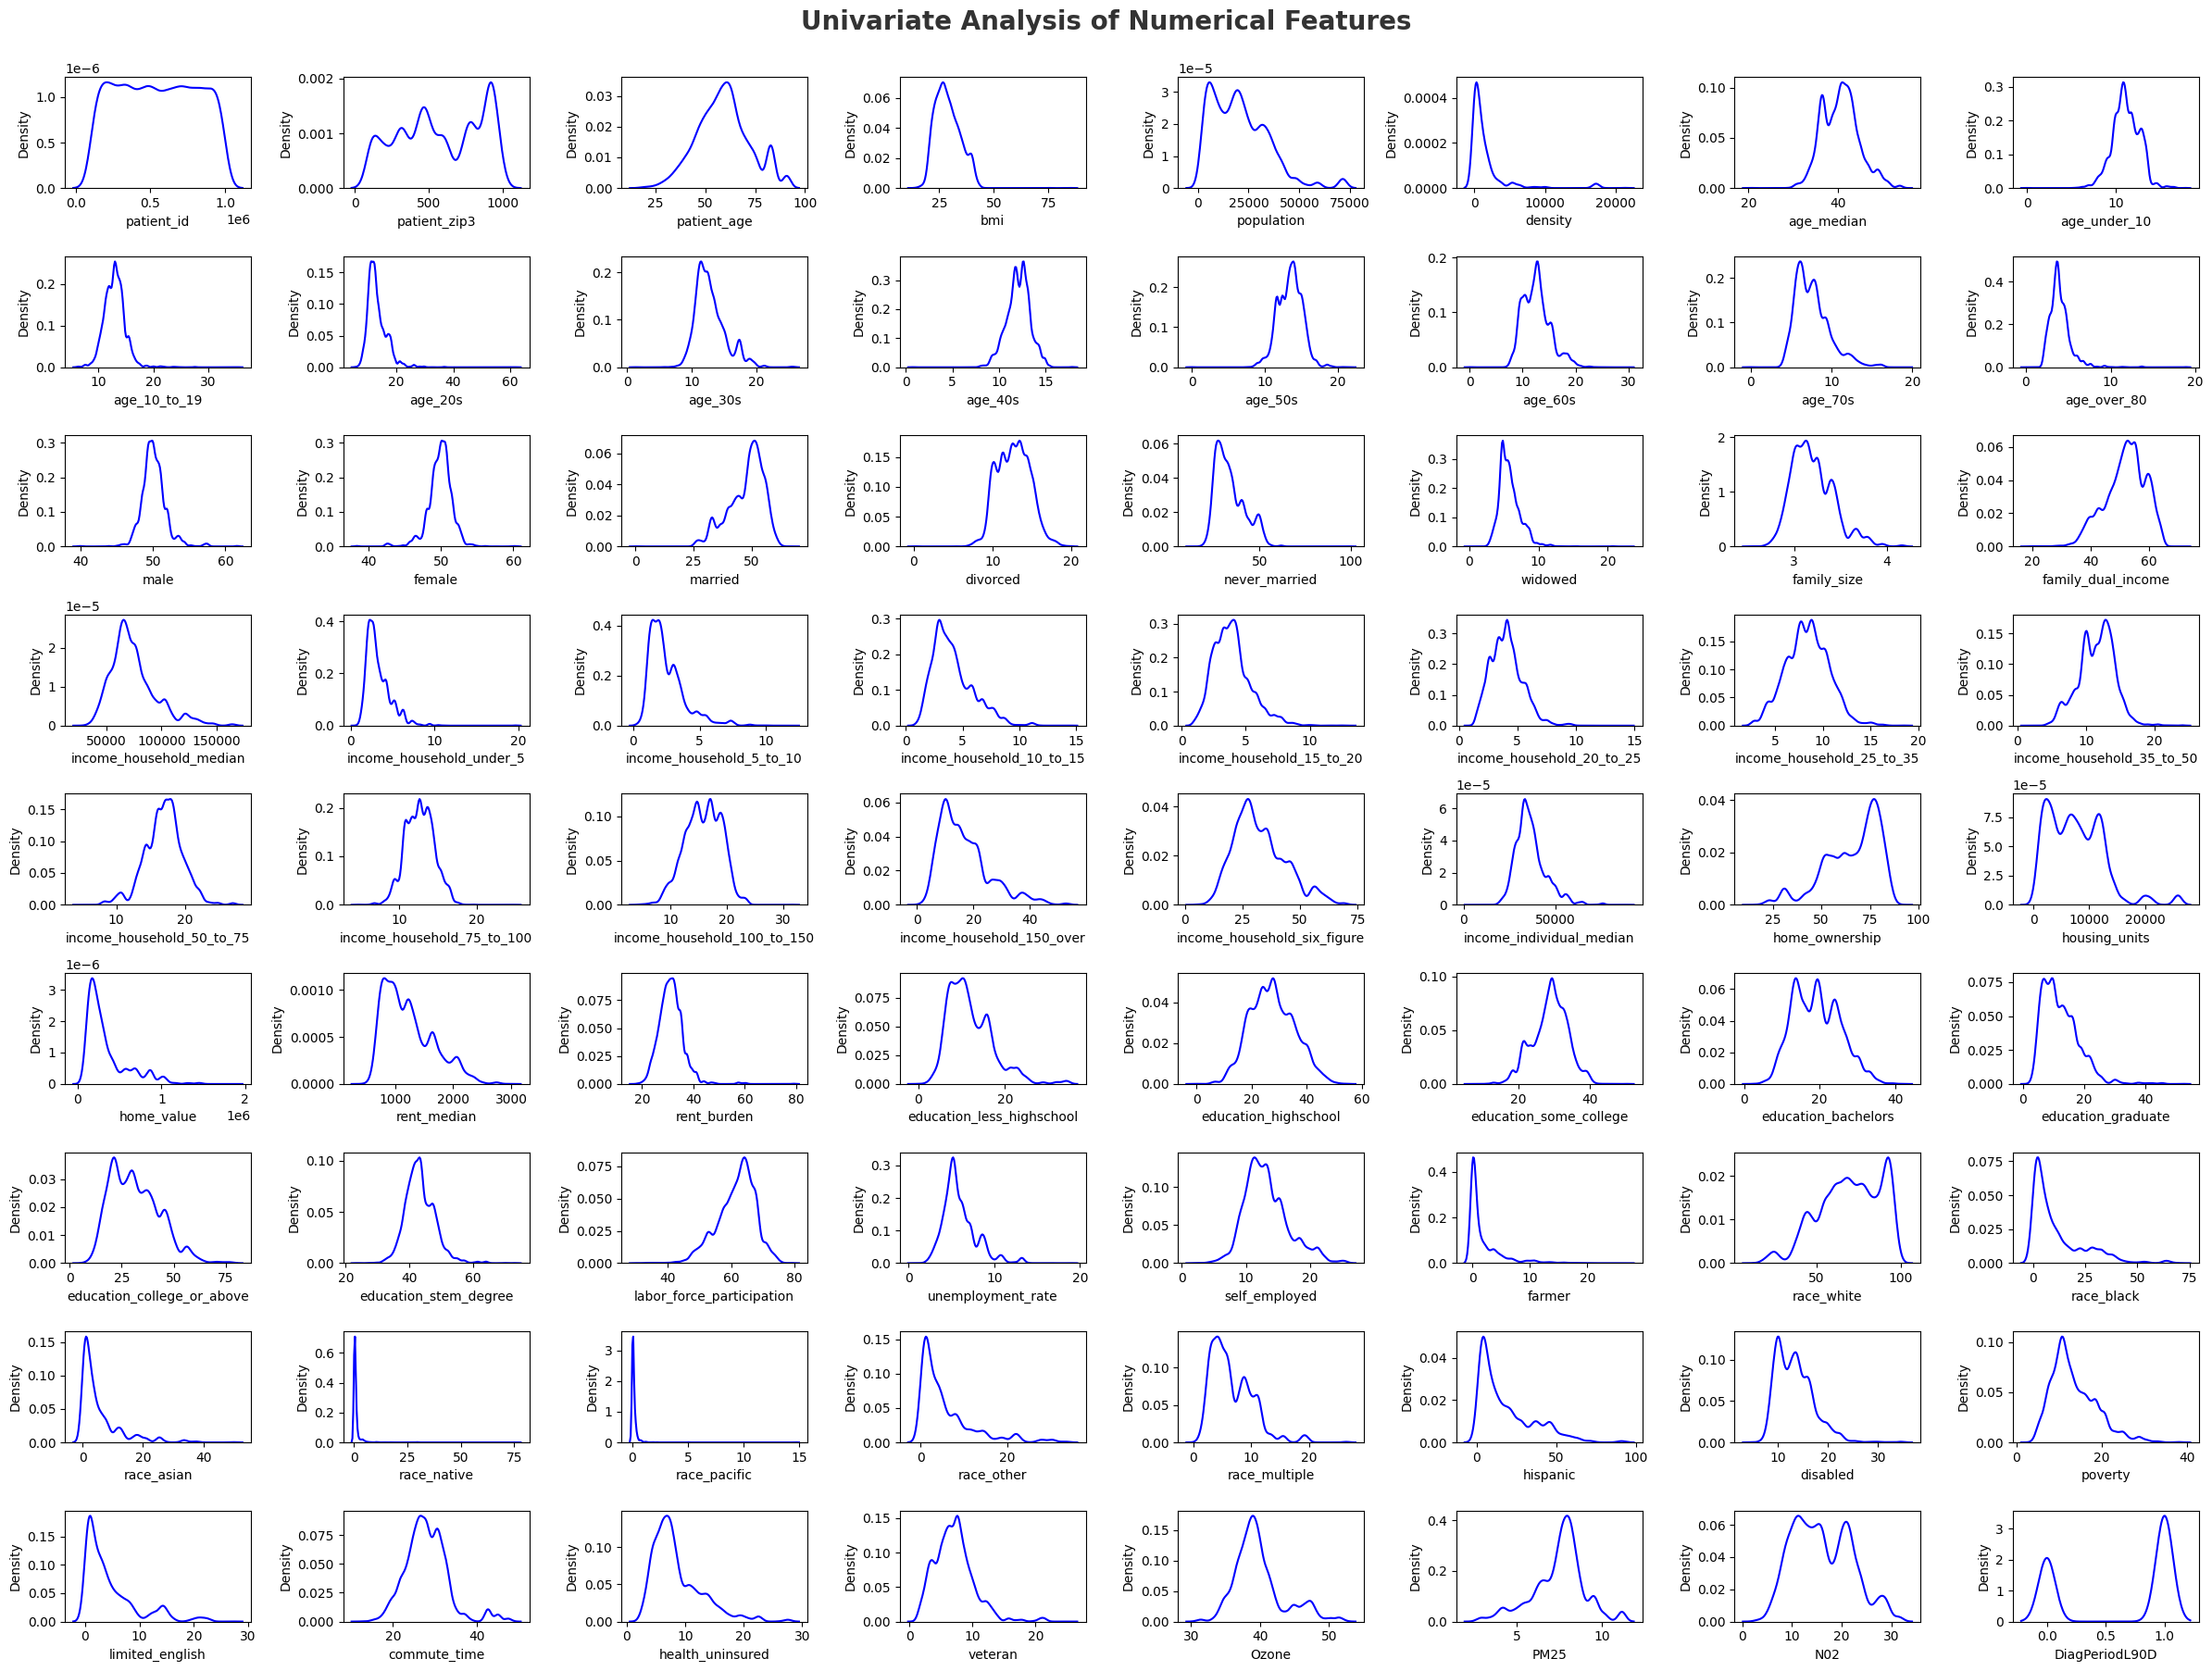

In [38]:
num_features = len(numeric_features)  # Get the number of features

# Adjust rows and cols based on the number of features
rows, cols = 9,8
plt.figure(figsize=(24, 18))  # Adjust figure size as needed
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,
            fontweight='bold', alpha=0.8, y=1.0)

for i in range(num_features):
    feature_name = numeric_features[i]
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(x=dfTraining[feature_name], color='blue')
    plt.xlabel(feature_name)  # Set labels within each subplot

plt.tight_layout() 


**Insights**
 - `no_of_employees` column looks more skewed but it may be because of outlies.
 - `yr_of_estab` is a discrete feature.
 - `privailing-wage` is a right-skewed distribution.

### Categorical Features

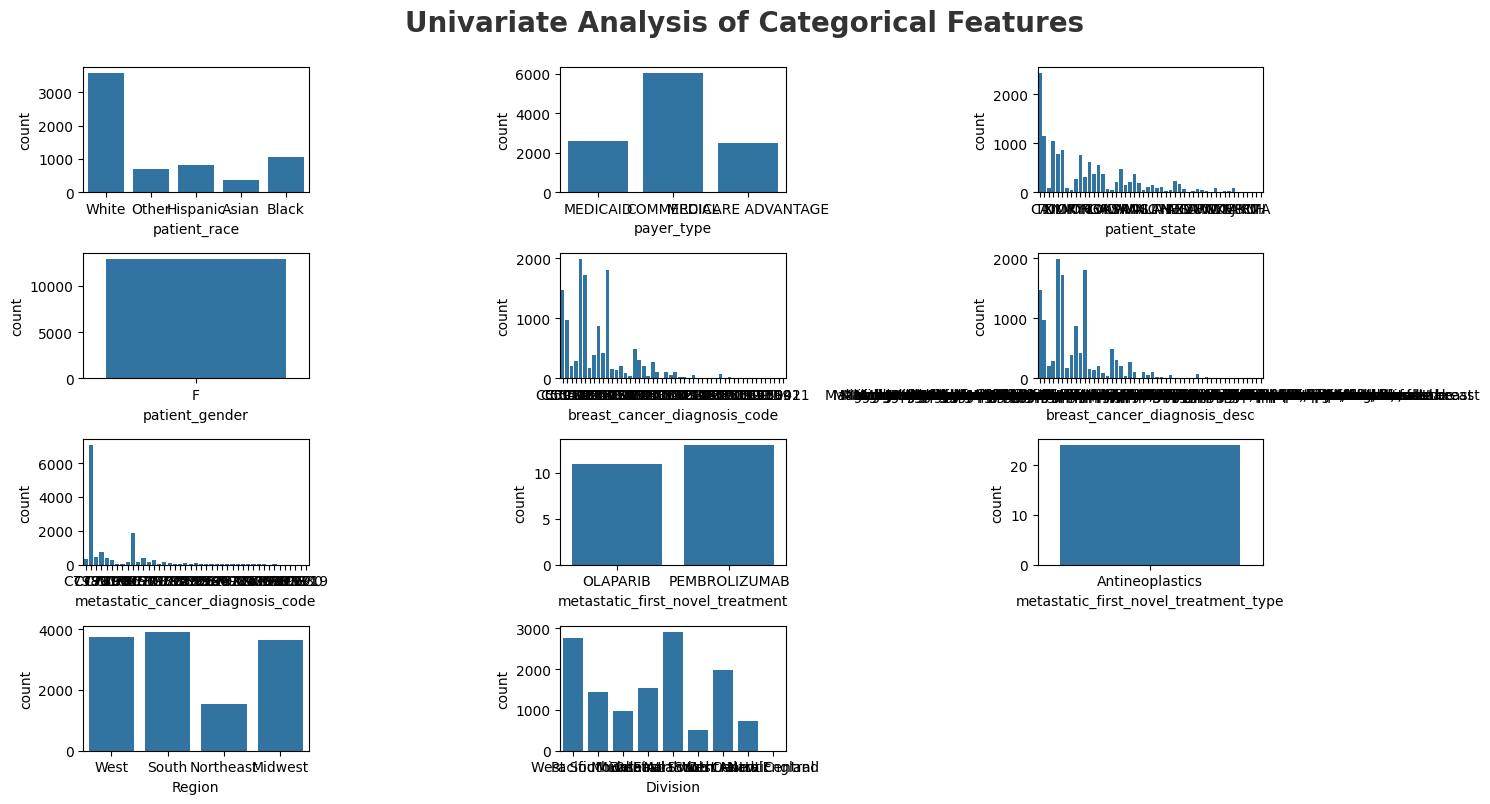

In [46]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=dfTraining[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `requires_job_training`, `unit_of_wage`, `full_time_position` and `continents` coulmns have signle category dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [9]:
discrete_features=[feature for feature in numeric_features if len(dfTraining[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(dfTraining[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['DiagPeriodL90D']

We have 71 continuous_features : ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate

### Check Multicollinearity in Numerical features

In [21]:
dfTest.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


**Insights**
 - There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [10]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(dfTraining['DiagPeriodL90D'], dfTraining[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,patient_race,Reject Null Hypothesis
1,payer_type,Reject Null Hypothesis
2,patient_state,Reject Null Hypothesis
3,patient_gender,Fail to Reject Null Hypothesis
4,breast_cancer_diagnosis_code,Reject Null Hypothesis
5,breast_cancer_diagnosis_desc,Reject Null Hypothesis
6,metastatic_cancer_diagnosis_code,Reject Null Hypothesis
7,metastatic_first_novel_treatment,Fail to Reject Null Hypothesis
8,metastatic_first_novel_treatment_type,Fail to Reject Null Hypothesis
9,Region,Reject Null Hypothesis


**Report** 
* Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [24]:
dfTraining.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

In [12]:
continues_features=[feature for feature in numeric_features if len(dfTraining[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree

IndexError: index 37 is out of bounds for axis 0 with size 37

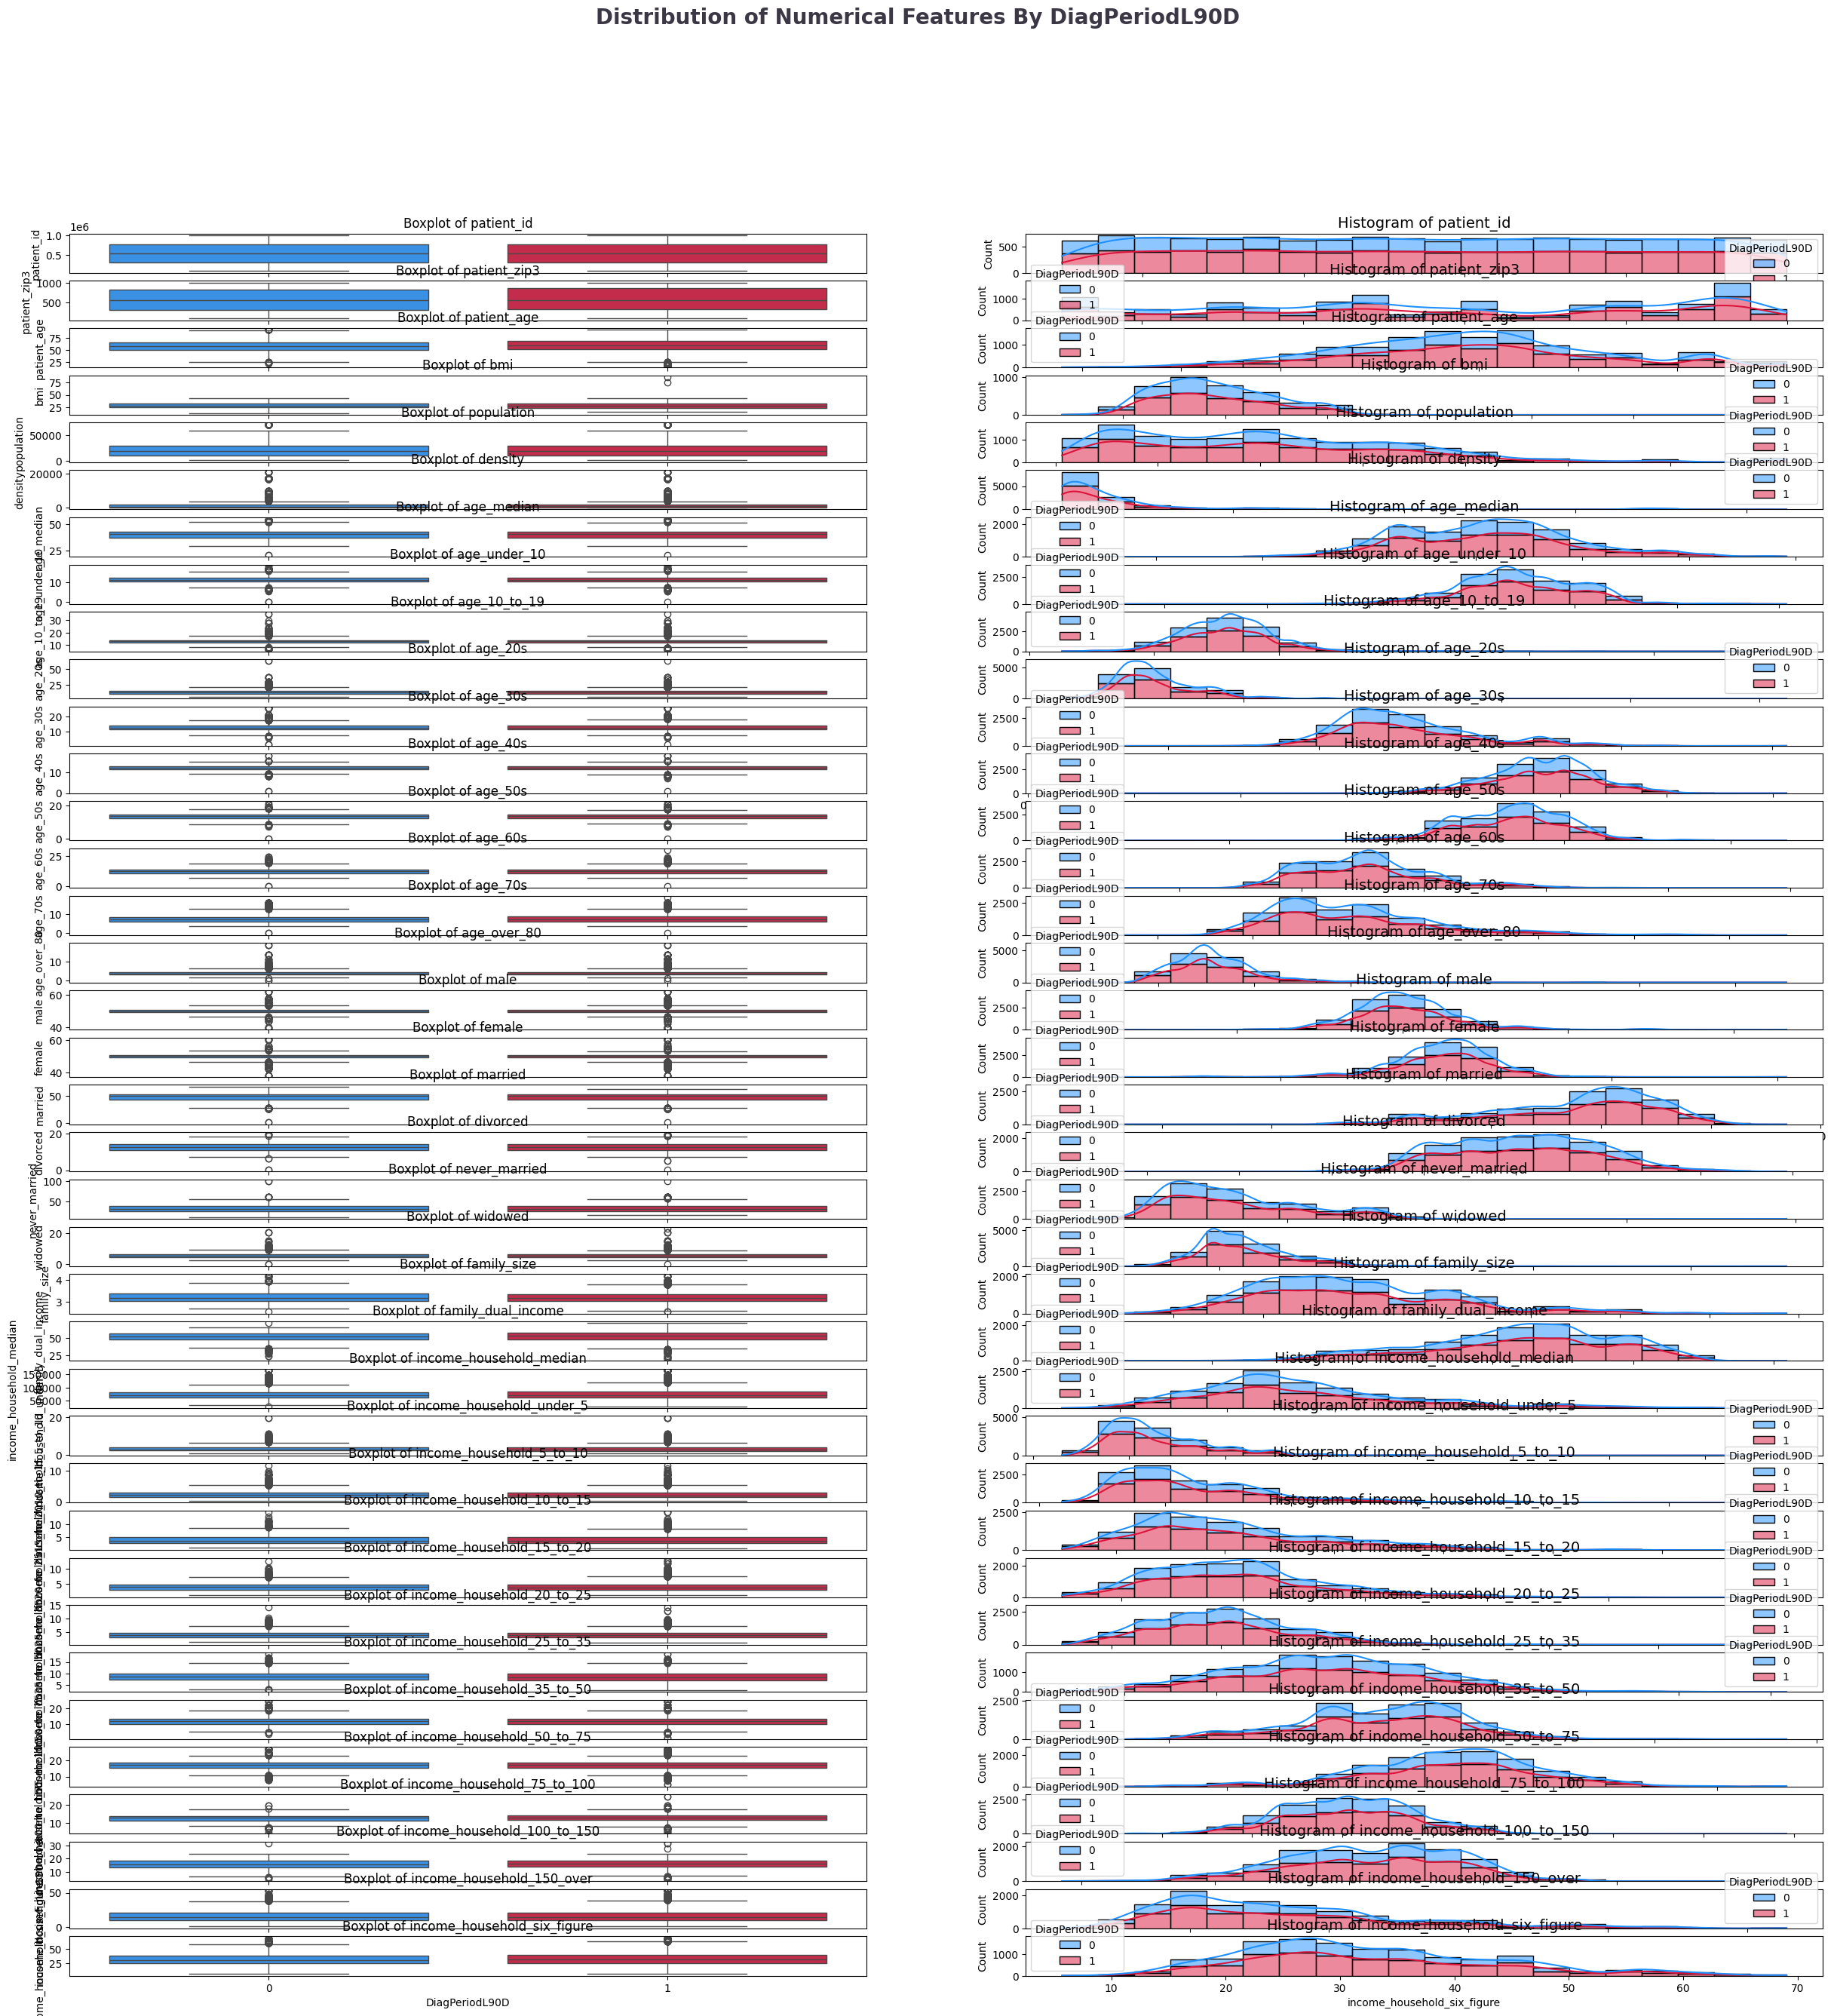

In [22]:
clr1 = ['#1E90FF', '#DC143C']
num_features = len(continues_features)
rows, cols =  37 , 2
fig, ax = plt.subplots(rows, cols, figsize=(30, 30))  # Increased figure size
fig.suptitle('Distribution of Numerical Features By DiagPeriodL90D', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i in range (0, len(continues_features)):   
    sns.boxplot(data=dfTraining, x='DiagPeriodL90D', y=continues_features[i],  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {continues_features[i]}', fontsize=12)
    sns.histplot(data=dfTraining, x=continues_features[i], hue='DiagPeriodL90D', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {continues_features[i]}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.2, hspace=0.4)
# plt.savefig('images/multivariate_num.png')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

clr1 = ['#1E90FF', '#DC143C']

# Ensure data availability:
if dfTraining is None or continues_features is None:
    print("Error: dfTraining or continues_features is not defined.")
    exit()

num_features = len(continues_features)

# Strategic grid layout:
rows = int(num_features ** 0.5) + 1  # More rows for taller plots
cols = min(4, num_features // rows)  # Limit columns for readability

# Adjusted figure size:
figsize = (15 * cols, 12 * rows)  # Adjust as needed
fig, ax = plt.subplots(rows, cols, figsize=figsize)

fig.suptitle('Distribution of Numerical Features By DiagPeriodL90D',
            color='#3C3744', fontsize=20, fontweight='bold', ha='center')

for i in range(min(num_features, rows * cols)):  # Limit loop to grid size
    feature_name = continues_features[i]

    # Boxplot with aspect ratio control:
    sns.boxplot(data=dfTraining, x='DiagPeriodL90D', y=feature_name, palette=clr1, ax=ax[i // cols, i % cols])
    ax[i // cols, i % cols].set_title(f'Boxplot of {feature_name}', fontsize=12)
    ax[i // cols, i % cols].set_aspect('equal')

    # Histogram with tighter layout:
    sns.histplot(data=dfTraining, x=feature_name, hue='DiagPeriodL90D', bins=20, kde=True,
                multiple='stack', palette=clr1, ax=ax[i // cols, i % cols])
    ax[i // cols, i % cols].set_title(f'Histogram of {feature_name}', fontsize=14)

plt.tight_layout()  # Adjust spacing between subplots
plt.subplots_adjust()
plt.show()  # Display the figure


## Initial Analysis Report

* **No of Employees has many outliers which can be Handled in Feature Engineering and `no_of_employees` is Right Skewed.**
* **`yr_of_estab` is left skewed and some outliers below the lower bound of Box plot.**
* **`prevailing_wage` is right skewed with outliers above upper bound of box plot.**
* **There are No missing values in the dataset.**
* **The `case_id` column can be deleted because each row has unique values.**
* **The `case_status` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Delete the patient_gender column because the value in the column is constant

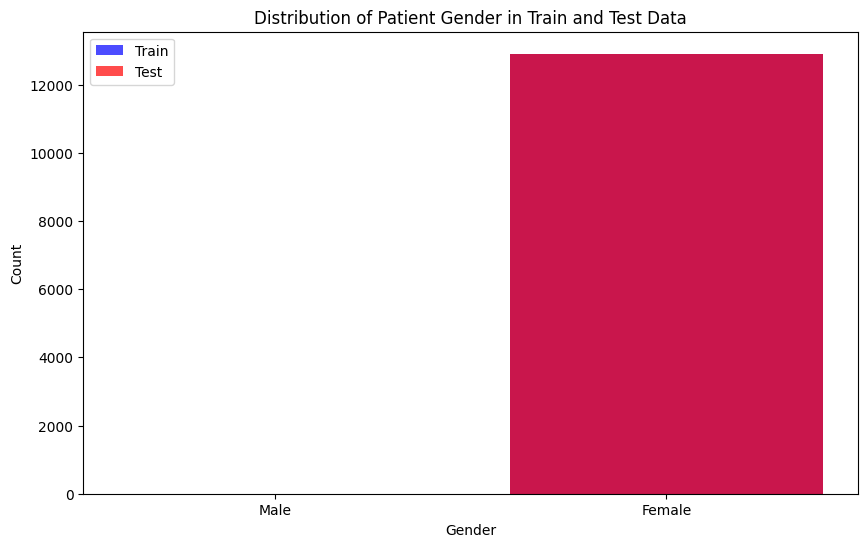

In [30]:
#Visualisasi patient_gender pada train dan test
# Separate data by gender
train_male = dfTraining[dfTraining['patient_gender'] == 'M']
train_female = dfTraining[dfTraining['patient_gender'] == 'F']

test_male = dfTraining[dfTraining['patient_gender'] == 'M']
test_female = dfTraining[dfTraining['patient_gender'] == 'F']

# Plotting
plt.figure(figsize=(10, 6))

# Plot train data
plt.bar(['Male', 'Female'], [len(train_male), len(train_female)], color='blue', alpha=0.7, label='Train')

# Plot test data
plt.bar(['Male', 'Female'], [len(test_male), len(test_female)], color='red', alpha=0.7, label='Test')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Patient Gender in Train and Test Data')
plt.legend()

# Show plot
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

### 4.2 Does applicant Continent has any impact on Visa status ?

In [31]:
dfTraining = dfTraining.drop(['patient_gender', 'female'], axis=1)
dfTest = dfTest.drop(['patient_gender', 'female'], axis=1)
dfTraining.shape

(12906, 81)

In [32]:
missing_population_data = dfTraining[dfTraining['population'].isnull()]
missing_population_data
# missing_population_data.isnull().sum().sum()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
10542,224030,Black,MEDICAID,FL,332,41,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C7800,...,NaN,NaN,NaN,NaN,NaN,NaN,35.544993,8.714016,16.558153,0


In [33]:
dfTraining = dfTraining.dropna(subset=['population']).reset_index(drop=True)

In [34]:
target = dfTraining['DiagPeriodL90D']
len(target)

12905

**Report:**
* As per the Chart Asia applicants applied more than other continents.
* 43% of Certified applications are from Asia.
* This is followed by Europe with 11% of Certified applications.
* Highest chance of getting certified if you are from `Europe` and followed by `Africa`

### 4.3 Does applicant education has any impact on Visa status ?

In [35]:
numerical_cols = list(dfTraining.select_dtypes(exclude=['object']).columns)
categorical_columns = list(dfTraining.select_dtypes(include=['object']).columns)

numerical_cols.remove('patient_zip3')
categorical_columns.append('patient_zip3')

In [36]:
uncommon_zip3 = dfTest[~dfTest['patient_zip3'].isin(dfTraining['patient_zip3'])]['patient_zip3']
print(len(uncommon_zip3))
dfTest.loc[dfTest['patient_zip3'].isin(uncommon_zip3), 'patient_zip3'] = None

29


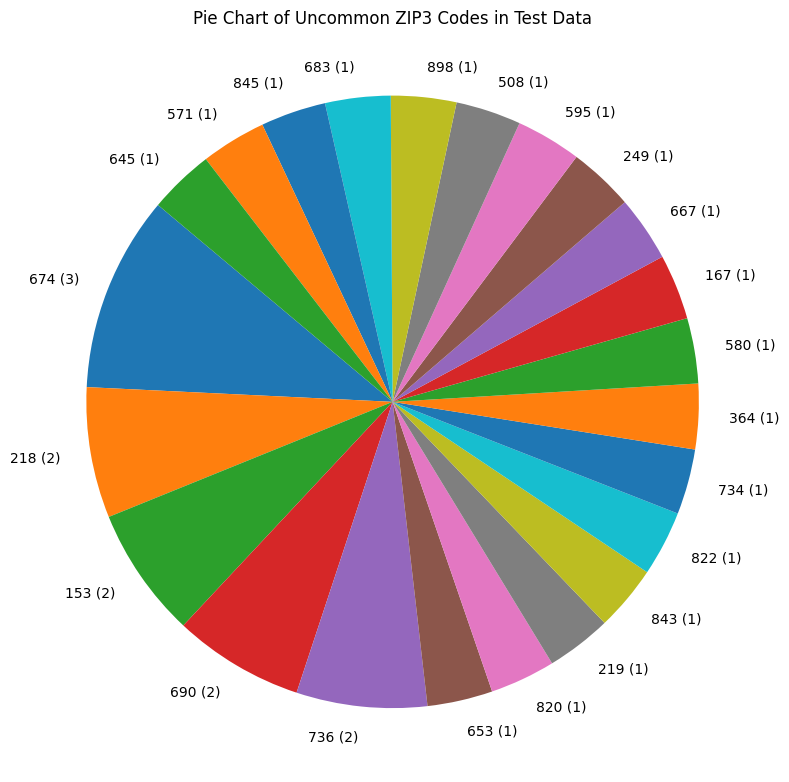

In [37]:
#Visualisasi kode patient_zip3 yang ada di data test tpi tidak ada di data train
# Hitung jumlah kemunculan nilai unik di uncommon_zip3
uncommon_zip3_counts = uncommon_zip3.value_counts()

# Plotting
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(uncommon_zip3_counts.values, labels=[f"{zip3} ({count})" for zip3, count in zip(uncommon_zip3_counts.index, uncommon_zip3_counts.values)], startangle=140)

# Adding title
plt.title('Pie Chart of Uncommon ZIP3 Codes in Test Data')

# Show plot
plt.axis('equal')  # agar pie chart menjadi lingkaran
plt.tight_layout()
plt.show()

**Insights**
- education status has high impact
- `Doctorate` and `Master's` graduates have higher cange of being accepted then the others.